In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle  


%matplotlib inline

plt.style.use('ggplot')

In [2]:
# open saved object
with open ('song_data.p', 'rb') as fp:
    song_data = pickle.load(fp)

In [3]:
song_data.head()

,artist,artist_id,song,duration,dyn_range,key,loudness,tempo,time_sig,total_fade
song_id,,,,,,,,,,
7E12QRk94o3DBLzkySXFqn,Hardwell,6BrvowZBreEkXzJQMpL174,Creatures Of The Night,180.80000,42.522,5,-5.237,149.710,4,3.24862
4GwXdVLueKZ8YhYjZmWtYh,Hardwell,6BrvowZBreEkXzJQMpL174,Live The Night,133.12549,53.725,10,-3.909,127.984,4,4.62626
6C6MLXm77V9VH0v27oJRak,Hardwell,6BrvowZBreEkXzJQMpL174,Thinking About You,191.31147,30.799,6,-3.197,121.994,4,2.56226
1UPyhGntpIx9jGJ5UVtKVS,Hardwell,6BrvowZBreEkXzJQMpL174,Call Me A Spaceman - Radio Edit,189.37501,53.315,3,-3.595,127.952,4,11.37664
6jmTQwFzejCurofZDz7x9k,Hardwell,6BrvowZBreEkXzJQMpL174,Off The Hook,177.05841,56.246,11,-3.754,129.967,4,8.22589


In [4]:
from sklearn import preprocessing

def data_as_array(df):
#     keys = pd.get_dummies(df['key'], prefix='key')
#     keys = keys.mul((1/12.), axis=0)
    X = df[['acousticness', 'instrumentalness', 'valence',
           'danceability', 'energy']].values
#     X = preprocessing.scale(X)
#     X = np.concatenate((X, keys.values), axis=1)
    return X

In [259]:
df, pl = data.drop(data.tail(10).index), data.tail(10)
pl_data = data_as_array(pl)
song_db = data_as_array(df)
eu_dist = np.sqrt(((pl_data - song_db[:, np.newaxis, :])**2).sum(axis=2))
suggestions = df.iloc[np.argmin(eu_dist, axis=0)].sort_values('tempo', ascending=False)
np.argmin(eu_dist, axis=0)

### Fetch new features

In [198]:
def get_track_features(track_id):
    r = requests.get("https://api.spotify.com/v1/audio-features/{0}".format(track_id), 
                     headers={'Authorization': 'Bearer {}'.format(token['access_token'])})
    if r.status_code == 200:
        return r.json()
    else:
        raise IOError('Spotify API request unsuccessful. Status code:{}'.format(r.status_code))


In [251]:
from auth import Token
import requests
import time

authorization = Token()
authorization.load_secrets()
token = authorization.get_token()


error_file = open("error_songs.txt", "w")

song = 0

track_data = []

for i in song_data.index[1249:]: 
    print (i)
    if song%10==0:
        token = authorization.get_token()    
    try :
        track_data.append(get_track_features(i))
    except ValueError:
        print("huge problem with song {}".format(track['song_id']))
        error_file.write(track['song_id'])
        continue
    print (song)
    song += 1
    time.sleep(2)

    
error_file.close()

2jfk3m8nq5IvB35s2xIs1O
0
75yUmYDFb9tqmeXni8bJ69
1
6vmYIyS1CImTs6ooYiwbBn
2
3yVl3fuLU7rjYhByVtnNZC
3
1mexL2tyJRrIFvOtpK9wXi
4
0cxK63adCc4SqPHUKcrUEH
5
2Tn1Mq5QdL58fh1Rl1Ew77
6
6upoK6OSFZVPLzSZ9WXVkQ
7
6MSAO2alLbhU5EwchMWMX1
8
3eCAD8D4jl68HVXfEGEEzT
9
3VqvplTOOBj50E3uxWcvth
10
4q0BCMZUB4XeMWxsentaoF
11
7eDrxsh5PQnsqiVNZxN9Z6
12
0QqMkiJWTcOqm7nxD222Ik
13
38lFbx8dsIPvPfF8CTCW8S
14
28b4ttlhy5ZkfL9zbmhX9a
15
3paHqKGUBNsSOPFozhQzVR
16
7pJ3V0ABrnsWFU3i7P9yU0
17
6vl7x6j1hCS3SbVhJNJJP8
18
1XbGxaC15JNPDl4eXYulkT
19
3WdYIUmhqn7svMJio4p4aH
20
4iuNZTcvT9diFySSzVsnVS
21
1qX2eMwJzsQdhPg2CrmC1r
22
3rcawAZAKd8Ryi30fSHclr
23
7ANroj1yWw0YEGcLf7HO3Q
24
3QfsB9tPwAjMb5b9P7r3Z5
25
63lwbZioX7RZzvQ0sJNd7u
26
54GF8mtmYowe8JSKbI3viA
27
6QRChvrJzuvw8felxvZLbj
28
02wVmJecRUCtkppST87OLx
29
2C4WbJzwqzCFza9rhZ9S6M
30
0NiXXAI876aGImAd6rTj8w
31
5bZtRlMBU76vHuDOb1GM5u
32
51NBMjiv4t1nUiLC9Bim3G
33
2mCF8L0brIs88eH6Kf2h9p
34
2o5woNaj4eQXCwbrJ001A2
35
5AFMjlqAA0skXGqZHGZDxt
36
3SKtdLILoiMMNy9Wnk3Mi9
37
3NFvv5bC6HWtxUftIBm8Qd

307
5BHQgdYNXLHFSZaoSGXQh5
308
3dN0wAkMTGZkm8YhXxOjsV
309
0qban8Y8jW5R3OCBbNF30v
310
3wDdU9Cu6o5jv4PQT1NKab
311
5qM61pJDpUnVDjrSOkaouT
312
5DJTYOAHZEKjNqXpOwnomi
313
5vtQOcVlNyqLsqNKkUAP1i
314
4m5zY9PRJvqPRDhDMJwSel
315
5XnozudaDl2ke9N3jFl8C4
316
3COHXcLRK9brRjMolzkD7Y
317
4mgearnxcRBtuysKylvDYE
318
3fAPcwGO7pea21rE48r1Yu
319
3IvmnP87iy7D51zEOCt1sl
320
3KBptiU3BShNb4993kbDSe
321
1Wve83RcS2IGmWyCYSGVqr
322
6FemVsNUb2lzWsDRm14FUJ
323
1X1DWw2pcNZ8zSub3uhlNz
324
37sINbJZcFdHFAsVNsPq1i
325
38xWaVFKaxZlMFvzNff2aW
326
4Musyaro0NM5Awx8b5c627
327
09ZcYBGFX16X8GMDrvqQwt
328
71qNRlNDnPahvATE7Zl4Nw
329
2NecaO9lqX35z3XmuNuOgh
330
4VTL9bM6qaSTsYGVianqzr
331
3mTEYjm3kIm4YzJ5zxJZjs
332
49rpdsNYJirTTf6p6mMvag
333
7oUjf3UvLJbRelKiDip47v
334
6Po2A4lsnVu0GrQ8Dy1nme
335
3Vmbt5Yw39WqaIg4eRoOmk
336
1bDLMtY69Cx6inNN9kaYkk
337
2M98FO4fkGec4lzsafk8YY
338
2WCgqwPrWuDZ3Bu59kTQS7
339
3igu6bCzkaIrioZIhK3p2n
340
37OjMlwuUVWWmVKrV8CiUQ
341
3MpR460YBQfy8WJLQZghuD
342
2Iq6HhIquO7JKr0KfTNLzU
343
6RKGBcDtgzXx21zUjpeu6F
3

611
4lharVQjYNhByFR8dSHkMA
612
63Qco1ncI5U4qEUnxL1DsH
613
1bA2ZK7CFxEMnyn1dWP2jp
614
0GSU6yLOJqO10ziQuBLWOE
615
64dkTKKNLwbjBuU4xnS2ei
616
4OuuTwky6Lupc7zDJNtig6
617
5g3W328MEzEqIw4yUq6Nx7
618
4wRKpAB1gmuWeQ31GKVfrw
619
5teGX9dkVCZOuao7dOWs7l
620
0inC6uPAfZQzx4ZrTSP18r
621
7DTlsMOQjGysXHpwwpHuPl
622
39z2CyYexbcwgD0pEeUUeu
623
2Q30PV0ylsdIDWLlCMzdJ6
624
1ygGjD0tjpE337xp4wGddD
625
2kB3CHIzTXPWlkZKPVZoQY
626
6sZHCkmQa8hzxfdI9MuywS
627
4GnZ2C54pHjYoB2xPpngQo
628
2OCj79BJYRaKXbPNZUSWr0
629
4P174FbtBMhgeKyYxzvyvu
630
5Gis3rbXy28VG5WG8hmtZI
631
6I9VzXrHxO9rA9A5euc8Ak
632
3MjUtNVVq3C8Fn0MP3zhXa
633
6naxalmIoLFWR0siv8dnQQ
634
4fixebDZAVToLbUCuEloa2
635
2i9q8CteBmpslOJeQdMGqA
636
3KliPMvk1EvFZu9cvkj8p1
637
7jk7gqyEonmVVYahZN5zhW
638
6ic8OlLUNEATToEFU3xmaH
639
2ssO8vh0AzVr5zxumbSO7G
640
6ldwfK0yWgTAlmIfuQkTYN
641
2GV039LpIeFtgTKKIZPrf0
642
4TFpuAlt1nvgBTkupcNuMO
643
3uleUeZ5eyYCNGiwcc1Exp
644
7nobjDCjkn6Y8UDQFt2mga
645
0ulKrOPVE3vyyEmm6TjmzL
646
6v3mRcNuGPT2Xb7H1R2ThY
647
0BnVapG9j905TzdPlR1OgM
6

915
1cem4pcGxNJqheNlpuvmEb
916
2ydFInU4v5BwVwzI0XHLB1
917
3yYMeFtHL3AoXsRAkXO4qR
918
0AOEd0Zw22aTE8LzsS4EMg
919
31D60kD3CU1EzPZS3p17RO
920
412CkPtLh68KLPg0pLrC53
921
2ldAdghnrO34HPcZ0IWfTu
922
1KcnJTiXJXAqW5bB7zpkBC
923
6Wrn8vD4z8kHBQpTDQOkUS
924
6PR49koVvHYRxAVFgUV07l
925
5CYJB5Md92kvcrZ4lJDALY
926
7iefpa6pT7TSARrHKGe3VJ
927
6GnhWMhgJb7uyiiPEiEkDA
928
5iUQMwxUPdJBFeGkePtM66
929
66wkCYWlXzSTQAfnsPBptt
930
2e0PQjgRNMDKeaMH49tHnC
931
2lpygKqzPFtItQ4ss3cgfb
932
4brX8MJs5hxErgq48f9REO
933
3uYm4MtU6jUQft2DtGqEoZ
934
6hzbRKhJHo6cfCHSnNaDS8
935
5aQmsZCESbhasWW5VARdS8
936
4z0PnuB07fxtVZZRWsCfxb
937
0RilVXCOQf4AD6a4uTTs7d
938
2nCmCt4B5vkabS0zeOuc1Z
939
1eXH2ranEyYm5pSUTcmFXo
940
4KVNqK5oXi3dCrIszi3rcE
941
49CTqnjw0WX1iEQI0yxBVq
942
1HFb7QC2E6wUDkte5mUfn5
943
68VdJqtlEgKMIoPh50yGvp
944
1JOfIbHZCTqSKJwzFdvSo3
945
2k9DNiysRuHFjh9kdO8xRN
946
41c1d7t0xFIZozzuTxuAmb
947
7CpbhqKUedOIrcvc94p60Y
948
3ENHpbTuY72FukZbwGP6bc
949
6PdEKf8CyyZfrFAGFi37gb
950
68St7eauFGOLlzkFlIhh3j
951
7rVJO4dQ60zMqsuj1tG2Hw
9

1211
5s6OqEnp0In8OFTxL6O8Aa
1212
7upJI4tZAZ9H7k6Egqw0mG
1213
3knuv0LYZBr7MNLzq1BWFr
1214
7fBHjuqAIVOdy5xoNxy5YQ
1215
2QCndYqRherBtKjBpyySC6
1216
2dgFqylK6gyILa4HY65u0y
1217
2pwnEzgIzYL4AOw4ousjkB
1218
5xqYosUgntU0KlUIGCIaBY
1219
2V1jR8mxrYCD9nXaem1tMz
1220
5YnY2sr2dSFvXSNaZntWdJ
1221
4FquNAgja6onlomj4QLNvH
1222
1EwRTHXHW7knKiXN5s74R0
1223
6qIqEZ5A7a7YxkrsBF9GTk
1224
3o8IcTmHZSt4cHgqO1PkRe
1225
4karzvPZYOqGprojUT3imC
1226
31l6q7ijP9pz3C1q6kf6lv
1227
45FRNb28lz3oCX7ofL0rr4
1228
6g3HcyyaXweCdPZ8bA2dMz
1229
1taFdXzBHQ8OtmUFmYwhk7
1230
3PihKPy6s0mcMeEHXZMKID
1231
4PNLIx5wJpUTCMSCWCyg0O
1232
6Fv4bsNzJyfcyYY45hvbiU
1233
7DseAtdQ0B8FJL358vuhaa
1234
1znGxpojJSjxZZEWA5zWva
1235
7fC2VKgYfCW68vlMhmcaAj
1236
1Po4pby30EDHDFUKGE9hgJ
1237
79M3Eq1q61lkeQJ1OCVEdZ
1238
0hTiTU0yqthnByyZDD3bcc
1239
1wnq9TwifJ9ipLUFsm8vKx
1240
1WbsiwkBbjP9w7T8fBUoiz
1241
7HyEcQge7Nj46xNFpKrsi5
1242
0JRab5KK5TKRiUuLiRw0WD
1243
4KEdXMwdTAjsELGfjWNUKe
1244
44NRdYQw7P0GWuiunRv3hr
1245
4a9i7rCLfPjbS1sNamZeQN
1246
5uGsG0LfotfWDq6

1504
4lzgh4ecOYBsRpj6xLucJu
1505
7yb3jfEkn7GI8KBpfo1WdJ
1506
5NqGwbo68D9Yq2F2CI3kF2
1507
7rZhuWUW5Me2iR24YkafXw
1508
1QLxB9eXxijlrfflOUnBq4
1509
3SD5SQW6BJOOmAjeCj1g0f
1510
47kD23H6H8pWRrq3qkjCHG
1511
6c7D34787LOtPm8tzhsLgH
1512
1LxKKYsJNPeBdOwdudsJzv
1513
6TWgRy0WZEyPFIkYU505s8
1514
0rHJxNaQRMGK6Y4TUx3xRO
1515
5ZWwLNhwmJXM7yKZJ5sxN1
1516
7mhk9WyqZZzvTTCQKfh2iV
1517
6opC9QRzTviOM6y7hYhKh6
1518
15JDhPEDnXD0mJaZnTfKvl
1519
5w1vhNA2OEWUQ371QzyMmM
1520
4YY7RSmIyTDyuds8ERBF52
1521
0fQ4aYENEakPclOlAyFtAX
1522
1EeuOVl8ZxeRdoqFt74h46
1523
0BA5T1jWPQWeJF2aeCrX1T
1524
6wGVirTppn0xliRlf6j48R
1525
2sJWgvdlfT5BNJ8MgbbTsb
1526
5jo5Qm8bARXh6xb8YovhqP
1527
0rGvPYyS0jbfekLkI10ZRb
1528
01wOH4Sfuf64n0iwdhZ7bT
1529
10bHZmT4PlNWghzEjAvwOE
1530
7yGJcaSJgpgXamjmXBCb6j
1531
3MPC4VgnsdlTEua8QntLab
1532
2i7W3WG5ORkArjloAoF791
1533
7z5cJ9Z3Kwm9DazJp0kJ1P
1534
6mOeJcyl4qsleHc3FFpScO
1535
61VLMRzZ5AewWNAWdVcvii
1536
1sVOxOEyBhqk16v3F3ffcg
1537
0UzsyQUVuKKu1CLBfVPUe0
1538
3blnw5Z6v5yiGueFGgS6uB
1539
0JPcFhl3n8CMGx1

1797
6TCWK0swzjyTDVd5DkMdEK
1798
1qqUMAfEbOJQxsOutkUilN
1799
4ohNJqDAicClVSgUXyeBP3
1800
79VCC93t8efi4ZtMZ3qCcC
1801
3QG8w1aqNvQZdWn9jjhG8u
1802
1w8Lbj8wiNJdOPG5azhrnV
1803
4v2sFoK5YgSrByz50iVDS3
1804
5l8ueHMjzm2tauC0gJTJzx
1805
1W95NVSQowgt3Amps8mRiT
1806
5If3EU8AnktQS0yf8rc3BA
1807
0ZGkJlkTO2tqn6nRC3PSFj
1808
5ZnzVZrSja6miEOxZIV8Q6
1809
4VO1K5TsBbx8Zzu8052slF
1810
4hhDqZgcSUOifI5c1kVOZD
1811
3cuJoZKPLis1pW3NGhWdzX
1812
0qyPzFyBMKJQFUsrCi1CmZ
1813
47nkK89Vel3CMp8x5apv5D
1814
1h92OyaWkwgeR6EJtmTPEr
1815
76D5DQs6LigJ3KdD3iche2
1816
4zh5aVAWAKkeXTmXPkQ7uL
1817
5rXkgeY6rpcHcsolCpXZHR
1818
11VgxBuuNgaPpNZvRyCONl
1819
56zy9VR4DUJrdicVXeCaN8
1820
5lrOsw7J8R7shum7A4j36t
1821
4AMkFjTnRwiHhVmYGFJOgb
1822
6itF8MROxH2MKs5oBuvUTz
1823
0pJ1L8Rq1R3RGMerdFFe3I
1824
7wOtN6iDRIYTco063AangP
1825
2M6An7pyyNwEObR7c7uCVp
1826
6J5u0vxPw9hivRh6iIEbhi
1827
4DenxoUslmyLJB5vzurCBD
1828
3pS1o7AFco7QrjfkOHFYdI
1829
5soCqO6QzwbmjQNkqjDw4R
1830
1YUwv18VvGOJiVR76Cgztu
1831
5i3UbErXhgaTzNQV8olld6
1832
71XV3HIZXueMJ9p

2090
4XOZaPYeMn9hcbpyS90NnD
2091
0DxN6Ywom8nnndyQXdSBPy
2092
63IIUzd6eJBfCGIcF8MFnJ
2093
0xGGVLXciR1jnaGnIXWYtu
2094
1P30N7kY4XwOw7vwmjRxPH
2095
7r6KgeFLSGJqbu90KJg1Bv
2096
3HO9WZQpMiOSi0Mx11plnk
2097
4s53Uc7CoEtES0wHmr3peN
2098
1q3wJpuNy347RMDT183Vz2
2099
7l2ebahPf8PdpfKGeB0y40
2100
7Jl0EIvZNtTf5yC30uLGPF
2101
5b4w8P3f7blrOFDgrNpMMU
2102
4wSL1eb78y6zKVfY978bAD
2103
5TRnziMjgtOpzvnMQym4e5
2104
0jD5Lgblnc6EmLYUHtwNJ2
2105
5AtrTLQst7tDWdUEIFpcFy
2106
0siyQOTeoD8bAqStVR2f9G
2107
15yZiDfNoxaI8yiaLboIBh
2108
5omWAB5iNMHvbAfBSzkdu8
2109
3vIw7vxgUTPtppVwMfhcwo
2110
2s2nAHl0uelukXWMozMraH
2111
4XwKXDL5dgnSII5kSLnEW1
2112
0is4yL58CcQ4Gv4WgTGr9N
2113
51kc1t2rhLNYQN0nknM30C
2114
3rFVV0U7Ch6lzVB4inat9E
2115
42oEN35FPwWHOOtdWPj16C
2116
4L8hWvlh4UmKfIWsmujPmK
2117
3K3qKMsD5P9PRCbBV4lvgd
2118
3omXshBamrREltcf24gYDC
2119
12pdXFcruNcPUbZypKUDgz
2120
3IXRdLsQib8m0hBbQpe7T8
2121
4RvmQ5qbP5PxgJD0BN4EZK
2122
3msS7xaelR4Oa0n7IwHkgF
2123
33DLdGdo8h58yo0oucWsHT
2124
2slPSwOa6A605bhQkrcSdi
2125
3Zq3hTVRPNvAIK5

In [252]:
data = pd.DataFrame(track_data)

In [253]:
data.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.010600,https://api.spotify.com/v1/audio-analysis/2jfk...,0.445,225280,0.953,2jfk3m8nq5IvB35s2xIs1O,0.000000,5,0.2810,-2.463,0,0.0704,172.063,4.0,https://api.spotify.com/v1/tracks/2jfk3m8nq5Iv...,audio_features,spotify:track:2jfk3m8nq5IvB35s2xIs1O,0.471
1,0.194000,https://api.spotify.com/v1/audio-analysis/75yU...,0.642,259307,0.674,75yUmYDFb9tqmeXni8bJ69,0.000000,10,0.2870,-5.495,0,0.0992,124.952,4.0,https://api.spotify.com/v1/tracks/75yUmYDFb9tq...,audio_features,spotify:track:75yUmYDFb9tqmeXni8bJ69,0.533
2,0.306000,https://api.spotify.com/v1/audio-analysis/6vmY...,0.689,171600,0.462,6vmYIyS1CImTs6ooYiwbBn,0.000000,10,0.0977,-6.387,0,0.4840,182.076,4.0,https://api.spotify.com/v1/tracks/6vmYIyS1CImT...,audio_features,spotify:track:6vmYIyS1CImTs6ooYiwbBn,0.449
3,0.000798,https://api.spotify.com/v1/audio-analysis/3yVl...,0.759,257304,0.611,3yVl3fuLU7rjYhByVtnNZC,0.000004,5,0.2470,-6.349,1,0.0472,119.994,4.0,https://api.spotify.com/v1/tracks/3yVl3fuLU7rj...,audio_features,spotify:track:3yVl3fuLU7rjYhByVtnNZC,0.325
4,0.111000,https://api.spotify.com/v1/audio-analysis/1mex...,0.697,246713,0.495,1mexL2tyJRrIFvOtpK9wXi,0.000000,10,0.0805,-6.431,0,0.4270,182.221,4.0,https://api.spotify.com/v1/tracks/1mexL2tyJRrI...,audio_features,spotify:track:1mexL2tyJRrIFvOtpK9wXi,0.382


## PCA for Visualizations

In [264]:
from sklearn.decomposition import PCA, TruncatedSVD
from pandas.tools.plotting import scatter_matrix

X = data_as_array(data)
pcd = PCA(2).fit(X)
data_reduced = np.dot(X, pcd.components_.T)

In [265]:
def plot_params(length = len(X), sugg_ind = np.argmin(eu_dist, axis=0), pl_ind = np.arange(len(X)-10,len(X))):
    colors = np.zeros(length, dtype=np.int)
    size   = np.repeat(10, length)
    
    colors[pl_ind] = np.repeat(1, len(pl_ind))
    colors[sugg_ind] = np.repeat(2, len(np.argmin(eu_dist, axis=0)))
    size[pl_ind] = np.repeat(30, len(pl_ind))
    size[sugg_ind] = np.repeat(30, len(np.argmin(eu_dist, axis=0)))

    return colors, size


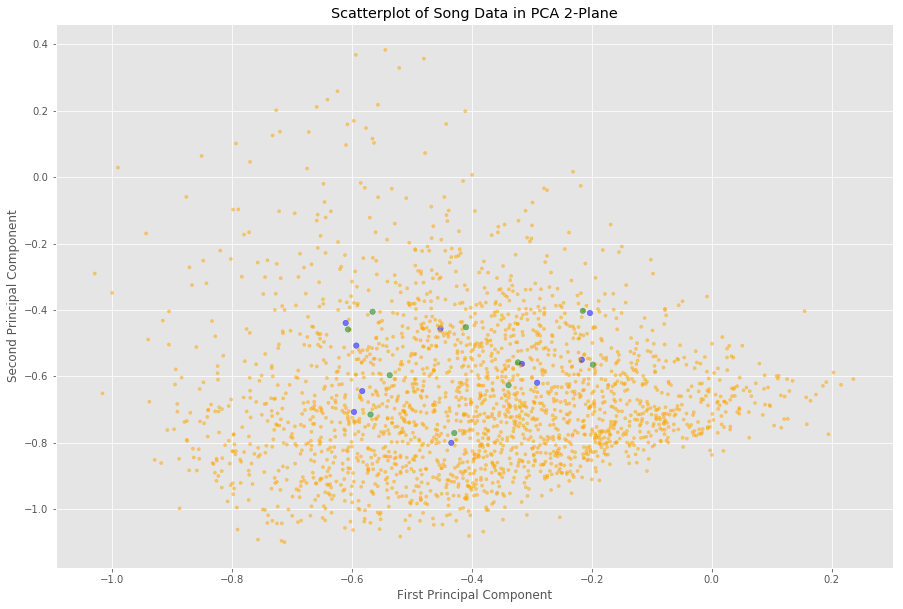

In [266]:
colors, size = plot_params()

fig, ax = plt.subplots(1, figsize=(15, 10))

ax.scatter(data_reduced[:, 0], data_reduced[:, 1], c= np.array(["orange", "green", "blue"])[colors], 
           alpha= .5, s=size, marker='o')
ax.set_title("Scatterplot of Song Data in PCA 2-Plane")
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")

In [247]:
data_reduced[-3]

array([ 0.17132813, -0.69778819])

In [267]:
len(data)

2207

In [113]:
colors = np.zeros(len(X), dtype=np.int)
colors[-10:len(colors)] = np.repeat(1, 10)

array([0, 0, 0, ..., 1, 1, 1])

In [123]:
colors[np.argmin(eu_dist, axis=0)] = np.repeat(2, len(np.argmin(eu_dist, axis=0)))

In [250]:
colors[9:]

array([0, 0, 0, ..., 1, 1, 1])

In [125]:
np.argmin(eu_dist, axis=0)

array([ 542, 1917, 1259,  239,  771,  596, 2314,  366, 1234,  685])

In [126]:
colors[542]

2

In [140]:
np.arange(len(X)-10,len(X))

array([2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463])

In [202]:
dict = get_track_features('7E12QRk94o3DBLzkySXFqn')

In [203]:
dict

{'acousticness': 0.364,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7E12QRk94o3DBLzkySXFqn',
 'danceability': 0.617,
 'duration_ms': 180800,
 'energy': 0.758,
 'id': '7E12QRk94o3DBLzkySXFqn',
 'instrumentalness': 0,
 'key': 5,
 'liveness': 0.111,
 'loudness': -5.237,
 'mode': 1,
 'speechiness': 0.0931,
 'tempo': 149.71,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/7E12QRk94o3DBLzkySXFqn',
 'type': 'audio_features',
 'uri': 'spotify:track:7E12QRk94o3DBLzkySXFqn',
 'valence': 0.327}

In [204]:
dict['valence']

0.327

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.364000,https://api.spotify.com/v1/audio-analysis/7E12...,0.617,180800,0.758,7E12QRk94o3DBLzkySXFqn,0.000000,5,0.1110,-5.237,1,0.0931,149.710,4,https://api.spotify.com/v1/tracks/7E12QRk94o3D...,audio_features,spotify:track:7E12QRk94o3DBLzkySXFqn,0.3270
1,0.007070,https://api.spotify.com/v1/audio-analysis/4GwX...,0.805,133125,0.968,4GwXdVLueKZ8YhYjZmWtYh,0.000910,10,0.3680,-3.909,1,0.2270,127.984,4,https://api.spotify.com/v1/tracks/4GwXdVLueKZ8...,audio_features,spotify:track:4GwXdVLueKZ8YhYjZmWtYh,0.1900
2,0.027100,https://api.spotify.com/v1/audio-analysis/6C6M...,0.702,191311,0.914,6C6MLXm77V9VH0v27oJRak,0.000060,6,0.2590,-3.197,0,0.0507,121.994,4,https://api.spotify.com/v1/tracks/6C6MLXm77V9V...,audio_features,spotify:track:6C6MLXm77V9VH0v27oJRak,0.6000
3,0.017200,https://api.spotify.com/v1/audio-analysis/1UPy...,0.581,189375,0.877,1UPyhGntpIx9jGJ5UVtKVS,0.000000,3,0.2480,-3.595,0,0.0486,127.952,4,https://api.spotify.com/v1/tracks/1UPyhGntpIx9...,audio_features,spotify:track:1UPyhGntpIx9jGJ5UVtKVS,0.3520
4,0.011300,https://api.spotify.com/v1/audio-analysis/6jmT...,0.705,177058,0.951,6jmTQwFzejCurofZDz7x9k,0.503000,11,0.3460,-3.754,0,0.0743,129.967,4,https://api.spotify.com/v1/tracks/6jmTQwFzejCu...,audio_features,spotify:track:6jmTQwFzejCurofZDz7x9k,0.1500
5,0.001760,https://api.spotify.com/v1/audio-analysis/36jz...,0.642,153499,0.961,36jz4zix5d5mE3W3so8cLU,0.007090,5,0.0736,-2.151,1,0.0509,127.976,4,https://api.spotify.com/v1/tracks/36jz4zix5d5m...,audio_features,spotify:track:36jz4zix5d5mE3W3so8cLU,0.1650
6,0.063900,https://api.spotify.com/v1/audio-analysis/1ljI...,0.295,200625,0.841,1ljIUIAxK8frRz1HNQx80Q,0.000023,6,0.2200,-2.287,0,0.0563,127.998,4,https://api.spotify.com/v1/tracks/1ljIUIAxK8fr...,audio_features,spotify:track:1ljIUIAxK8frRz1HNQx80Q,0.0602
7,0.003770,https://api.spotify.com/v1/audio-analysis/1NM2...,0.577,180923,0.985,1NM2NUzlN9SY8z5k4ZfRJB,0.142000,6,0.0471,-3.494,1,0.0749,129.956,4,https://api.spotify.com/v1/tracks/1NM2NUzlN9SY...,audio_features,spotify:track:1NM2NUzlN9SY8z5k4ZfRJB,0.0622
8,0.000767,https://api.spotify.com/v1/audio-analysis/25dl...,0.486,245538,0.906,25dl9vcAJ9F6D6K35I3Nbw,0.000544,4,0.2530,-4.634,0,0.0550,130.095,4,https://api.spotify.com/v1/tracks/25dl9vcAJ9F6...,audio_features,spotify:track:25dl9vcAJ9F6D6K35I3Nbw,0.1160
9,0.005240,https://api.spotify.com/v1/audio-analysis/6xQv...,0.554,202500,0.914,6xQvK7tPkhBzLdcCdJ0N73,0.000008,4,0.8520,-4.397,0,0.0855,128.002,4,https://api.spotify.com/v1/tracks/6xQvK7tPkhBz...,audio_features,spotify:track:6xQvK7tPkhBzLdcCdJ0N73,0.1000
